## 9.1 Leads Conversion

In [1]:
import sqlite3
import pandas as pd
db_path = 'C:/Users/gregoG/Documents/python/Olist_analysis/olist.sqlite'
db_connection = sqlite3.connect(db_path)

To end this exploration of the Olist database, let's have a look at the two remaining tables. First, we have **leads_qualified**, which contains a list of sellers that filled in the contact request form on Olist's website, filtered by the sales team (thus becoming "qualified")

The second table, **leads_closed** contains information on which of the previous sellers joined Olist's platform. This table contains many columns, and we won't look at them in depth here.

We'll build a plot of the number of leads per origin and how many of them signed up to Olist. The origin field of the **leads_qualified** table contains the origin category 'unknown' but also some null values, which we'll add to the 'unknown' group using the COALESCE function:

In [18]:
lead_conversion = """
SELECT 
    COALESCE(origin, 'unknown') AS origin,
    COUNT(DISTINCT leads_qualified.mql_id) AS qualified_leads,
    COUNT(DISTINCT leads_closed.mql_id) AS closed_leads,
    COUNT(DISTINCT leads_closed.mql_id) * 100.0 / COUNT(DISTINCT leads_qualified.mql_id)
        AS conversion_rate
FROM leads_qualified
    LEFT JOIN leads_closed USING (mql_id)
GROUP BY COALESCE(origin, 'unknown')
ORDER BY COUNT(leads_qualified.mql_id) DESC
"""

df = pd.read_sql_query(lead_conversion, db_connection)
df

,origin,qualified_leads,closed_leads,conversion_rate
0,organic_search,2296,271,11.803136
1,paid_search,1586,195,12.295082
2,social,1350,75,5.555556
3,unknown,1159,193,16.652286
4,direct_traffic,499,56,11.222445
5,email,493,15,3.042596
6,referral,284,24,8.450704
7,other,150,4,2.666667
8,display,118,6,5.084746
9,other_publicities,65,3,4.615385


Let's visualize the data using a grouped bar plot:

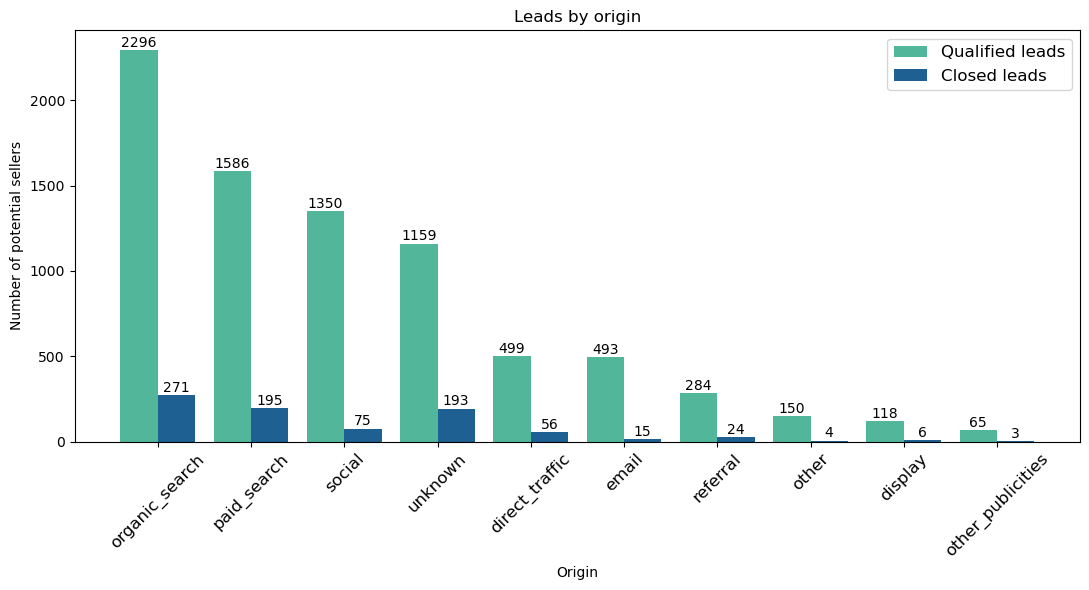

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns 
plt.figure(figsize=(11, 6))
bar_width = 0.4
r1 = range(len(df))
r2 = [x + bar_width for x in r1]
plt.bar(r1, df['qualified_leads'], color='#52B69A', width=bar_width, label='Qualified leads')
plt.bar(r2, df['closed_leads'], color='#1E6091', width=bar_width, label='Closed leads')
for i, v in enumerate(df['qualified_leads']):
    plt.text(i, v + 20, str(v), ha='center', fontsize=10)
for i, v in enumerate(df['closed_leads']):
    plt.text(i + bar_width, v + 20, str(v), ha='center', fontsize=10)
plt.xlabel('Origin')
plt.ylabel('Number of potential sellers')
plt.title('Leads by origin')
plt.xticks([r + bar_width / 2 for r in range(len(df))], df['origin'],
           rotation=45, color='black', fontsize=12)
plt.legend(fontsize=12)
plt.tight_layout()
plt.show()

As we can see, only a small proportion of qualified leads end up becoming Olist sellers. The largest sources of closed leads are 'organic_search' and 'paid_search', followed by leads of unknown origin. Let's build a plot of the *conversion rate* to see more clearly which channels are the most effective at bringing in sellers:

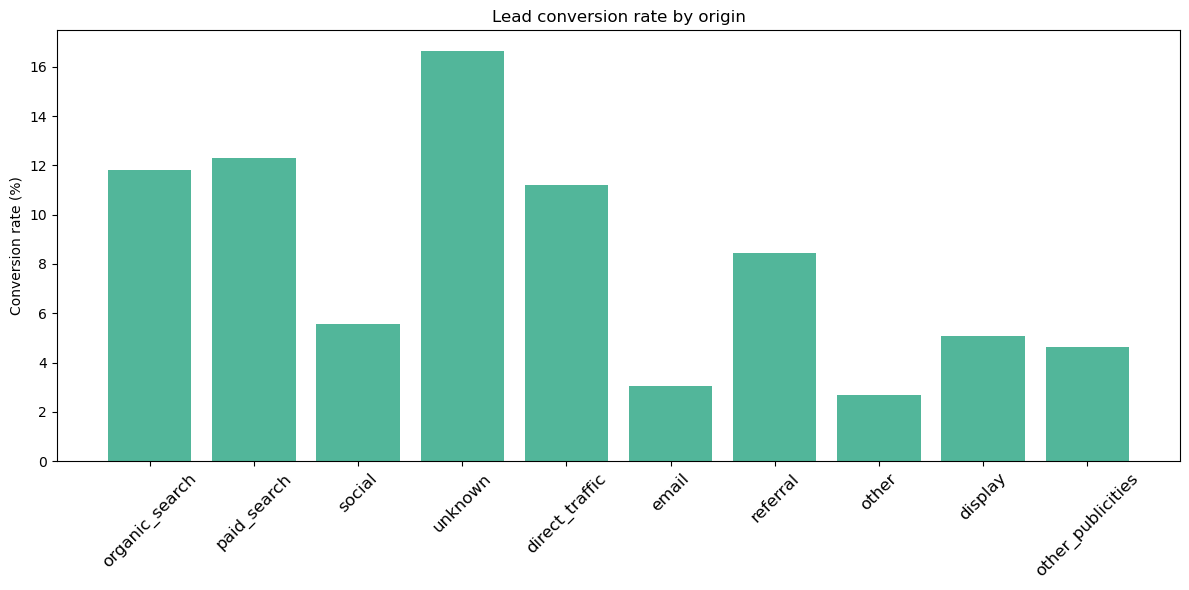

In [24]:
plt.figure(figsize=(12, 6))
plt.bar(df['origin'], df['conversion_rate'], color='#52B69A')
plt.ylabel('Conversion rate (%)')
plt.title('Lead conversion rate by origin')
plt.xticks(rotation=45, color='black', fontsize=12)
plt.tight_layout()
plt.show()

In the plot, we can see the proportion of leads that become Olist sellers by channel of origin, in the same order as the previous grouped bar plot.

We can see that, while **'paid_search'**, **'organic_search'** and **'direct_traffic'** have the best conversion rate, other channels such as 'email', 'social', 'display' and 'other_publicities' have lower rates of conversion.